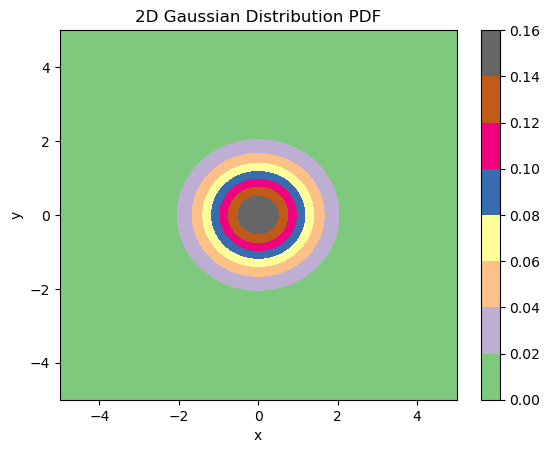

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the 2D Gaussian
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = 0  # correlation coefficient

# Create a meshgrid for our values
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Bivariate Gaussian formula
Z = (1/(2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))) * \
    np.exp(-1/(2 * (1 - rho**2)) * ((X - mu_x)**2/sigma_x**2 - 2*rho*(X - mu_x)*(Y - mu_y)/(sigma_x * sigma_y) + (Y - mu_y)**2/sigma_y**2))

# Plot the 2D PDF as a heatmap
plt.contourf(X, Y, Z, 50, cmap='Accent')  # You can use plt.pcolormesh() for a non-smooth version
plt.colorbar()
plt.title('2D Gaussian Distribution PDF')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


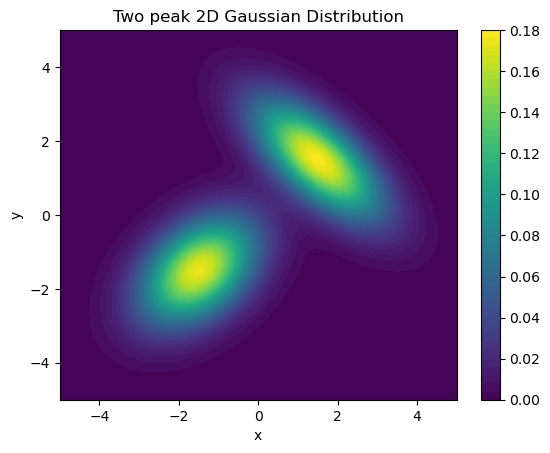

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_2d(X, Y, mu, sigma):
    """Generate 2D Gaussian distribution over X and Y"""
    d = np.stack([X, Y], axis=2)
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    N = np.sqrt((2 * np.pi) ** 2 * sigma_det)
    fac = np.einsum('...k,kl,...l->...', d - mu, sigma_inv, d - mu)
    return np.exp(-fac / 2) / N

# Create meshgrid for values
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Define parameters for two 2D Gaussians
mu1 = np.array([-1.5, -1.5])
sigma1 = np.array([[1.0, 0.4], [0.4, 1.0]])

mu2 = np.array([1.5, 1.5])
sigma2 = np.array([[1.2, -0.8], [-0.8, 1.2]])

# Generate 2D Gaussian distributions
Z1 = gaussian_2d(X, Y, mu1, sigma1)
Z2 = gaussian_2d(X, Y, mu2, sigma2)

# Sum contributions to get two peaks
Z = Z1 + Z2

# Plot the result
plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar()
plt.title('Two peak 2D Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()